<div class="alert alert-block alert-info">
<b>Описание проекта</b></div>

<div class="alert alert-block alert-info"> Даны данные Интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</div>


<div class="alert alert-block alert-info"> 
План: 
    
1) Изучить общую информацию

2) Подготовить данные

3) Провести исследовательский анализ данных

4) Составить портрет пользователя каждого региона

5) Проверить гипотезы

6) Написать общий вывод</div>

<b> ШАГ 1 </b>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st


In [4]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Выводы: в столбце Year_of_Release должен быть тип int, в столбце User_Score должен быть тип float

<b>ШАГ 2</b>

In [7]:
#заменим названия столбцов
data.columns = map(str.lower, data.columns)

In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
data.duplicated().sum()

0

Имеется много пропусков в столбцах year_of_release, critic_score, user_score, rating
Дубликатов нет

In [11]:
#заменим тип данных
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [12]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

В столбце user_score есть значение 'tbd', из-за которого мы пока не можем изменить тип данных. Оно означает to be determined, т.е. пока не определён. Заменим это значение на nan

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [15]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [16]:
data['user_score'] = data['user_score'].astype(float)

In [17]:
print(data['year_of_release'].isna().sum() / len(data['year_of_release']) * 100,'%')

1.609332934489979 %


У нас всего 1,6% пропусков года релиза, это незначительно влияет на данные, удалим пропуски

In [18]:
data = data[data['year_of_release']!='Nan']

In [19]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Убедились, что удалили пропуски


In [20]:
#cоздадим новый столбец total_sales и прибавим продажи всех столбцов
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [34]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

В колонках name и genre всего 2 пропуска, так же в этих строках пропуски по отзывам и рейтингу. Удалим эти строки 


In [22]:
data = data.dropna(subset = ['name','genre'])

In [23]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

Поставим заглушку для пропусков в столбце rating, чтобы не потерять важные данные, так как рейтинг ESRB предназначен для маркировки игр для США и Канады. Для других регионов он не заполняется


In [24]:
data['rating'] = data['rating'].fillna('no info')

<b>ШАГ 3</b>

In [25]:
# исследуем, сколько игр выпускалось в разные годы
data_games_years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

In [26]:
data_games_years.sort_values(by='year_of_release')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0.5, 1.0, 'Количество игр по годам')

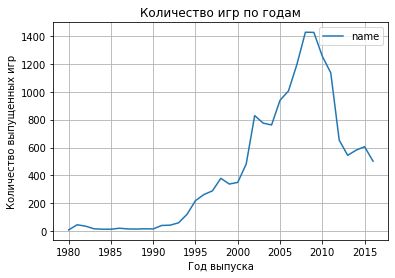

In [27]:
data_games_years.plot(grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество игр по годам')

Каждый год количество выпущенных игр росло до 2008 года, после начался спад. Особенно сильно количество игр росло с 1995 года. Данные до 1994 года не так важны.

In [28]:
# изучим, как менялись продажи по платформам
sales_platform = data.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')
sales_platform = sales_platform.sort_values(by='total_sales')
sales_platform.tail(5)

,total_sales
platform,
DS,802.78
Wii,891.18
PS3,931.34
X360,961.24
PS2,1233.56


Больше всего продаж на платформах PS2, X360, PS3, WII, DS

Text(0.5, 1.0, 'Продажи по платформам')

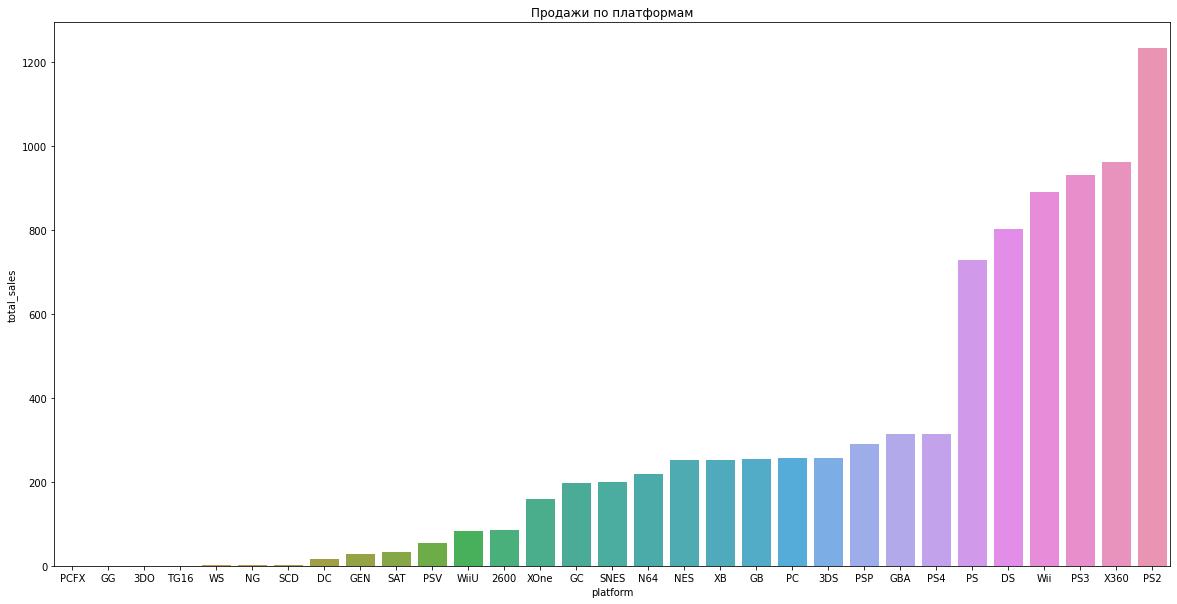

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x=sales_platform.index,y=sales_platform['total_sales'])
plt.title('Продажи по платформам')

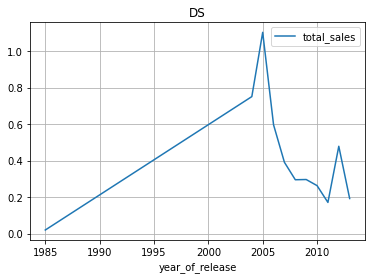

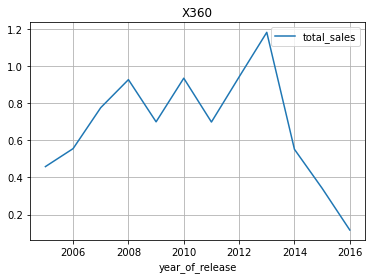

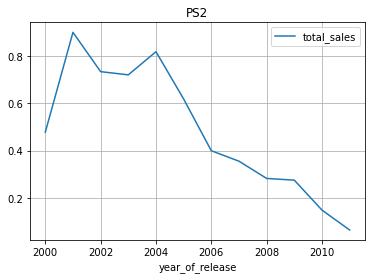

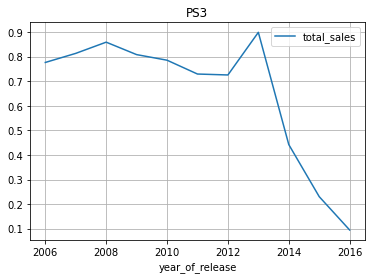

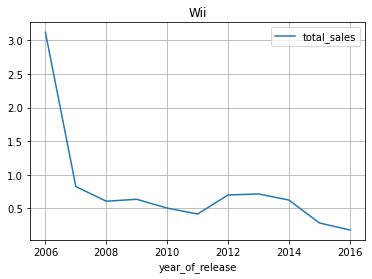

In [30]:
popular_platform = ['DS','X360','PS2','PS3','Wii']
for i in popular_platform:
    data_platform = data[data['platform'] == i]
    data_platform = data_platform.pivot_table(index = 'year_of_release', values = 'total_sales')
    data_platform.plot(grid=True)
    plt.title(i)

DS: В данных обнаружена ошибка, так как в 1985 году такой платформы ещё не существовало. В 2013 году продажи заканчиваются. В основном компания получала прибыль с 2003 до 2013 года. Пик приходится на 2005 год.

X360: продажи начинают расти с 2006 года и заканчиваются в 2016 году. Пик приходится на 2013 год

PS2: продажи идут с 2000 до 2011 года. Спад начинается в 2004.

PS3: продажи идут с 2005 по 2016 год, пик приходится на 2013 год, после продажи падают. Возможно, это связано с выходом игры GTA5 в 2013 году.

Wii: пик продаж был сразу после выхода платформы: в 2006 году. После пошёл резкий спад, продажи закончились в 2016 году.

<b>Выводы:</b> практически все игровые платформы в среднем существуют по 10 лет. Дольше всех существовала платформа DS.
У Wii был самый быстрый и резкий скачок продаж. 

Возьмём данные за соответствующий актуальный период.
Возьмём данные за период с 2014 по 2016 года. С 2014 года четкая тенденция к падению по всем платформам. Так же к 2014 году отвалился ряд платформ. Исследуем, какие платформы лидируют по продажам, растут или падают

In [35]:
data_actual = data[(data['year_of_release']>=2014) & (data['year_of_release']<=2016)]
data_actual.sort_values(by='year_of_release')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5246,Thief (2014),PS3,2014,Action,0.10,0.17,0.02,0.05,NaN,NaN,no info,0.34
6628,Just Dance 2015,PS3,2014,Misc,0.13,0.08,0.00,0.04,NaN,6.8,E10+,0.25
16294,Adventure Time: The Secret of the Nameless,X360,2014,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,no info,0.01
6678,Hatsune Miku: Project Diva F 2nd,PS3,2014,Misc,0.09,0.03,0.10,0.03,78.0,8.6,T,0.25
12502,Super Robot Wars OG Saga Masou Kishin F: Coffi...,PS3,2014,Strategy,0.00,0.00,0.06,0.00,NaN,NaN,no info,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
12382,Super Robot Wars OG: The Moon Dwellers,PS3,2016,Misc,0.00,0.00,0.06,0.00,NaN,NaN,no info,0.06
12387,Odin Sphere: Leifthrasir,PS3,2016,Role-Playing,0.02,0.01,0.03,0.01,NaN,7.0,T,0.07
12391,Assetto Corsa,PS4,2016,Racing,0.00,0.05,0.00,0.01,73.0,6.2,E,0.06
11891,Dark Souls III,PC,2016,Role-Playing,0.00,0.07,0.00,0.00,89.0,8.6,M,0.07


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

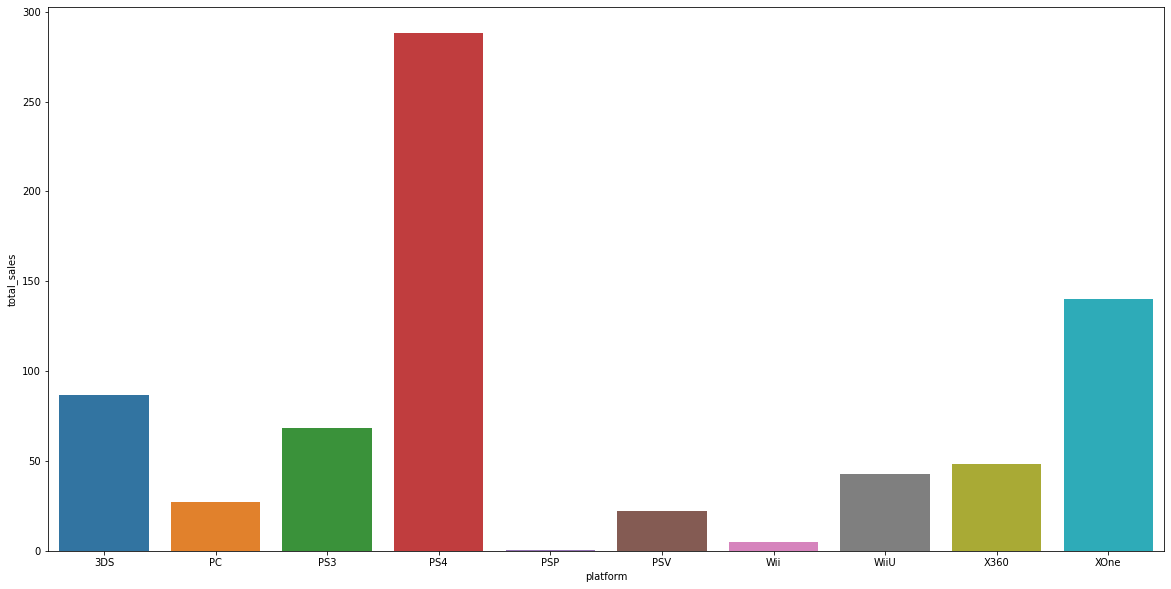

In [36]:
data_actual_2 = data_actual.pivot_table(values=['total_sales'],index='platform',aggfunc='sum')
data_actual_2.sort_values(by='total_sales')
plt.figure(figsize=(20,10))
sns.barplot(x=data_actual_2.index,y=data_actual_2['total_sales'])

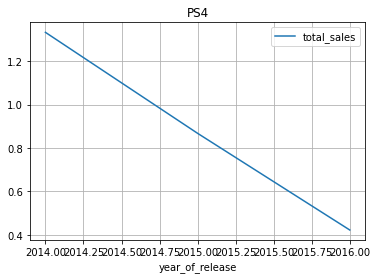

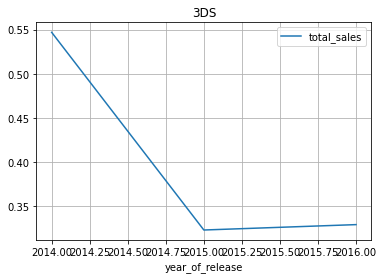

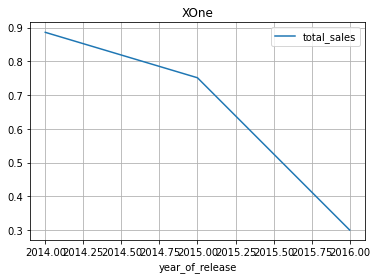

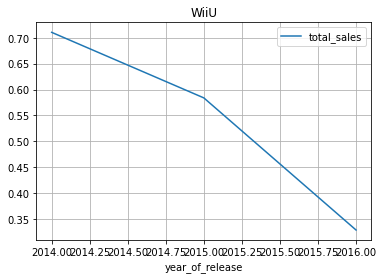

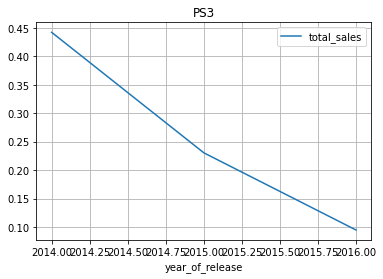

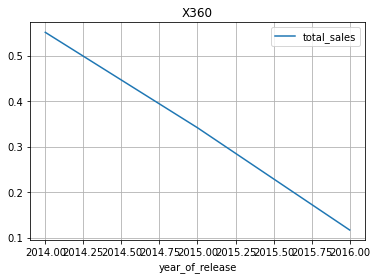

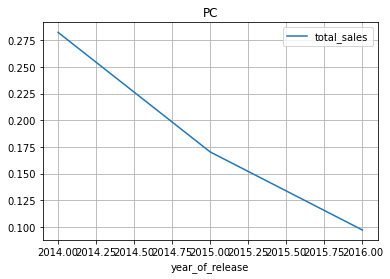

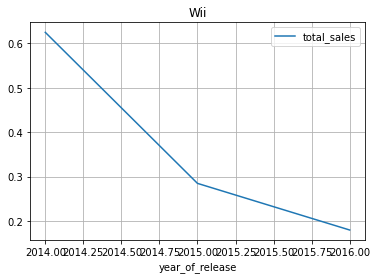

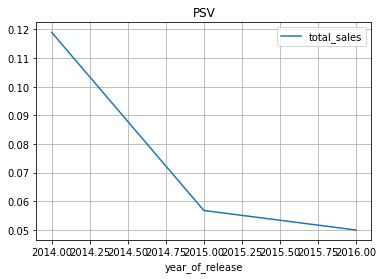

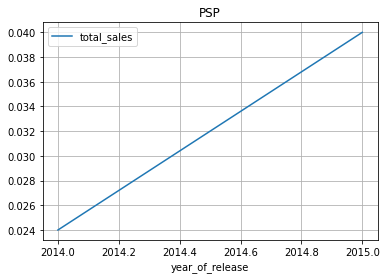

In [33]:
platforms = data_actual['platform'].unique()
for i in platforms:
    data_platform_2014_2016 = data_actual[data_actual['platform'] == i]
    data_platform_2014_2016 = data_platform_2014_2016.pivot_table(index = 'year_of_release', values = 'total_sales')
    data_platform_2014_2016.plot(grid=True)
    plt.title(i)

Продажи Wii начали падать с 2014 года. X360 была прибыльной платформой в 2014 году, после продажи начали падать. Такая же картина у PS3, XOne и 3DS. Продажи игр на всех платформах, кроме PSP падали в течение всего периода, но продажи игр на PSP закончились в 2015 году.

Потенциально прибыльные платформы: PS3, X360, PS4

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64


Text(0.5, 1.0, '"Ящик с усами" по глобальным продажам игр в разбивке по платформам')

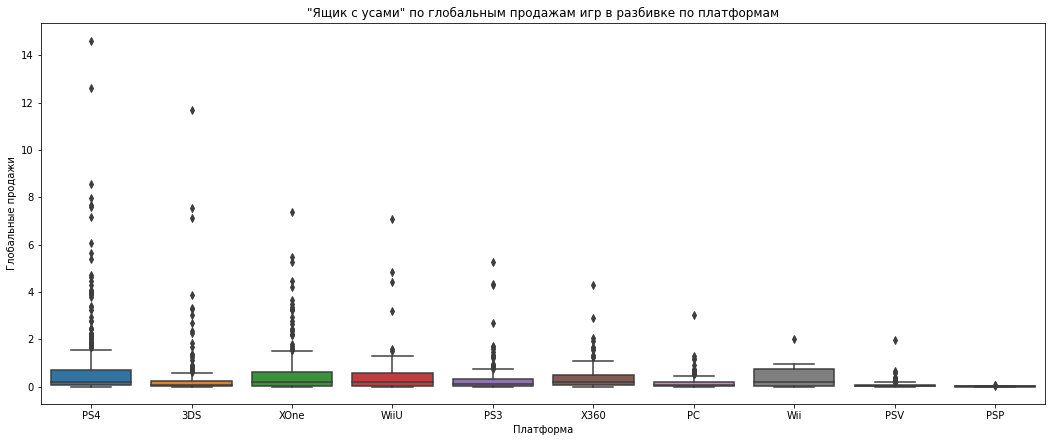

In [37]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(18,7))
sns.boxplot(data=data_actual,x='platform', y='total_sales')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
#среднее значение, медиана
print(data_actual['total_sales'].describe())
plt.title('"Ящик с усами" по глобальным продажам игр в разбивке по платформам')

Text(0.5, 1.0, 'отмасштабированный "ящик с усами"')

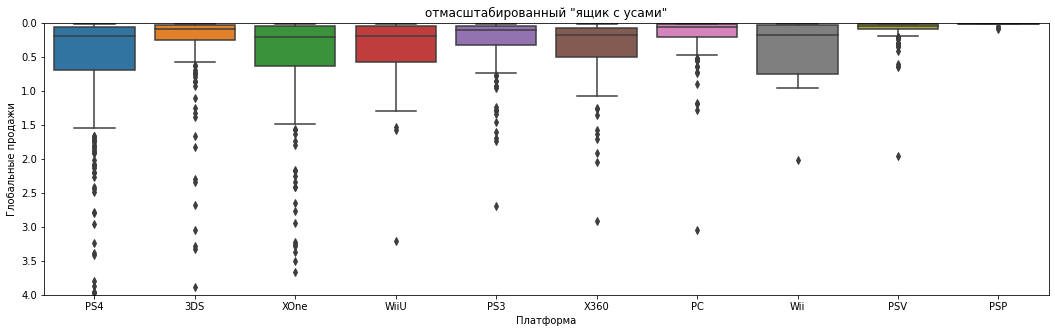

In [38]:
plt.figure(figsize=(18,5))
sns.boxplot(data=data_actual,x='platform', y='total_sales')
plt.ylim(top=0)
plt.ylim(bottom=4) 
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.title('отмасштабированный "ящик с усами"')

Больше всех продаж у Wii, PS4, XOne, затем WiiU и X360. У PSP продаж почти не было. Медиана у всех разная. Максимум продаж был у PS4. Меньше всего выбросов у Wii.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы

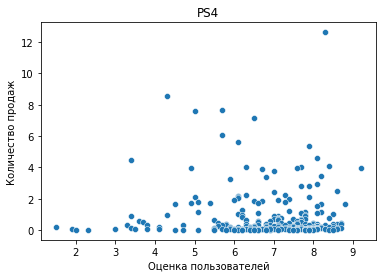

-0.04013158947269733
Корреляция между отзывами пользователей и продажами  PS4 : Слабая -0.04013158947269733




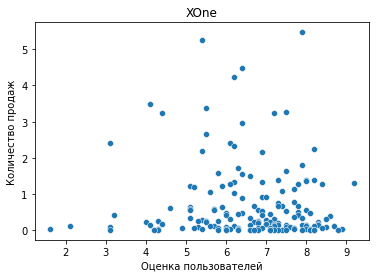

-0.07038392806475809
Корреляция между отзывами пользователей и продажами  XOne : Слабая -0.07038392806475809




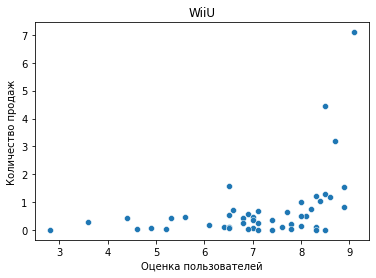

0.40792645792170773
Корреляция между отзывами пользователей и продажами  WiiU : Умеренная 0.40792645792170773




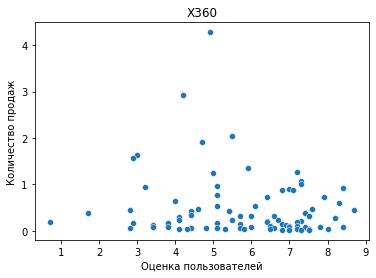

-0.138444570945665
Корреляция между отзывами пользователей и продажами  X360 : Слабая -0.138444570945665




In [39]:
popular_platform_actual = ['PS4','XOne','WiiU','X360']
for i in popular_platform_actual:
    sns.scatterplot(x='user_score', y='total_sales', data=data_actual[data_actual['platform']==i])
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Количество продаж')
    plt.title(i)
    plt.show()
    user_correl = data_actual[data_actual['platform']==i]['user_score'].corr(data_actual[data_actual['platform']==i]['total_sales'])
    print(user_correl)
    if 0.0 <= abs(user_correl) <= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', i , ': Слабая', user_correl)
    if 0.3 <= abs(user_correl) <= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', i, ': Умеренная', user_correl)
    if 0.7 <= abs(user_correl) <= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', i , ': Сильная', user_correl)
    if 0.9 <= abs(user_correl) <= 1:
        print('Корреляция между отзывами пользователей и продажами ',i, ': Очень сильная', user_correl)
    print('\n')
   

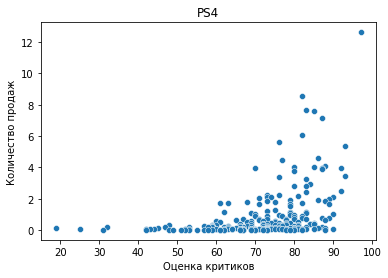

0.40266141068104083
Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.40266141068104083


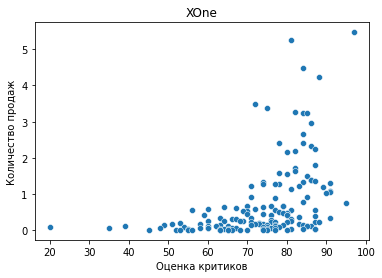

0.42867694370333226
Корреляция между отзывами критиков и игровой платформой  XOne : Умеренная 0.42867694370333226


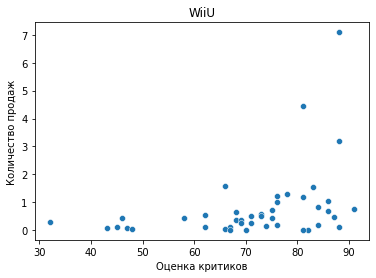

0.370201412480884
Корреляция между отзывами критиков и игровой платформой  WiiU : Умеренная 0.370201412480884


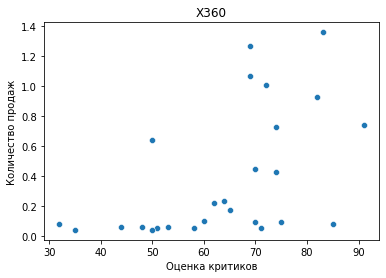

0.5257228356581523
Корреляция между отзывами критиков и игровой платформой  X360 : Умеренная 0.5257228356581523


In [35]:
for i in popular_platform_actual:
    sns.scatterplot(x='critic_score', y='total_sales', data = data_actual[data_actual['platform']==i])
    plt.xlabel('Оценка критиков')
    plt.ylabel('Количество продаж')
    plt.title(i)
    plt.show()
    critic_correl = data_actual[data_actual['platform']==i]['critic_score'].corr(data_actual[data_actual['platform']==i]['total_sales'])
    print(critic_correl)
    if 0.0 <= abs(critic_correl) <= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', i, ': Слабая', critic_correl)
    if 0.3 <= abs(critic_correl) <= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', i, ': Умеренная', critic_correl)
    if 0.7 <= abs(critic_correl) <= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', i , ': Сильная', critic_correl)
    if 0.9 <= abs(critic_correl) <= 1:
        print('Корреляция между отзывами критиков и игровой платформой ', i , ': Очень сильная', critic_correl)
        

Отзывы пользоваталей почти не влияют на продажи, кроме платформы WiiU. Отзывы критиков влияют на продажи умеренно. Покупатели прислушиваются больше к критикам, чем к оценкам других пользователей. Больше всего отзывы критиков влияют на продажи игр платформы X360

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [40]:
genre = data_actual.pivot_table(
    index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)
genre

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


Text(0, 0.5, 'Продажи')

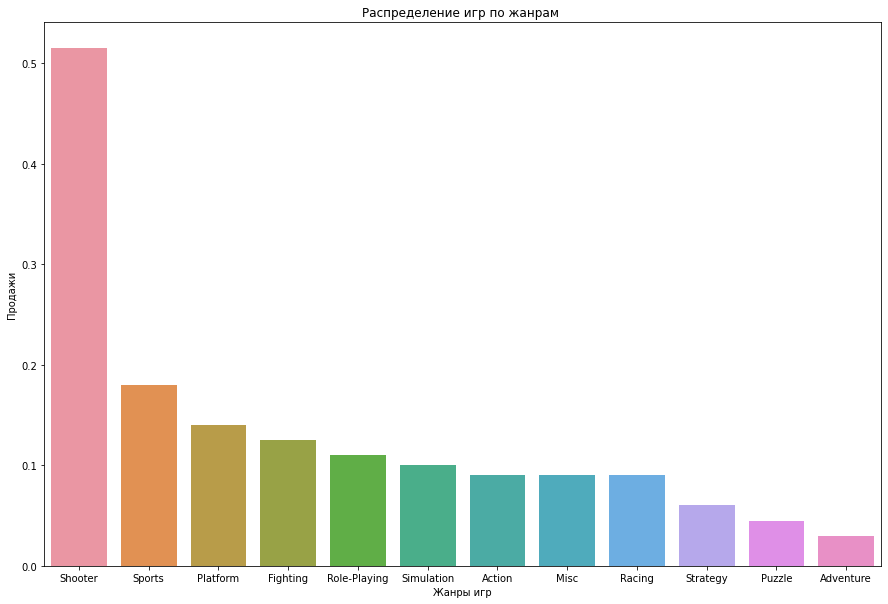

In [41]:
plt.figure(figsize=(15,10))
plt.title('Распределение игр по жанрам ')
sns.barplot(x=genre.index, y=genre['total_sales'])
plt.xlabel('Жанры игр')
plt.ylabel('Продажи')

Text(0.5, 1.0, '"ящик с усами"')

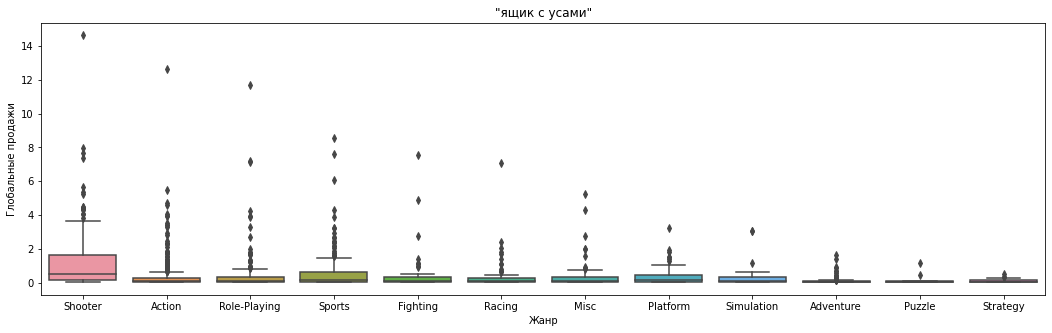

In [42]:
plt.figure(figsize=(18,5))
sns.boxplot(data=data_actual,x='genre', y='total_sales')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.title('"ящик с усами"')

Лучше всего продаются шутеры. Приключения продаются хуже всех.

<b>ШАГ 4 </b>

найдём самые популярные платформы (топ-5) для каждого региона. Опишем различия в долях продаж

platform
PS3      8.719896
3DS      8.953217
X360    11.191521
XOne    32.139044
PS4     38.996322
Name: na_sales, dtype: float64
None


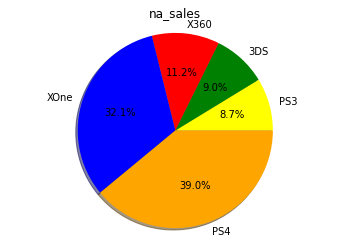

platform
3DS      6.832825
PC       7.616989
PS3     10.825704
XOne    19.604103
PS4     55.120380
Name: eu_sales, dtype: float64
None


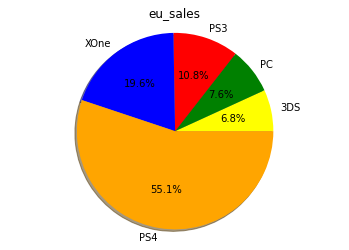

platform
WiiU     7.917253
PS3     12.152063
PSV     15.747861
PS4     16.267735
3DS     47.915087
Name: jp_sales, dtype: float64
None


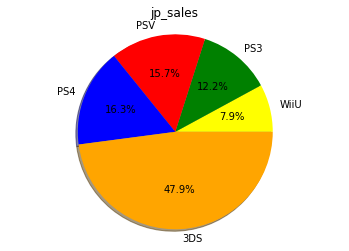

In [39]:
regions = ['na_sales','eu_sales','jp_sales']
def segment(d,sale):
    s = sum(sale)
    for i in d:
        j = d[i] / s
        print(j*100)
for i in regions:
    data_p = data_actual.pivot_table(values=i,index='platform',aggfunc='sum')
    data_p = data_p.sort_values(by= i).tail(5)
    print(segment(data_p,data_p[i]))
    colors = ['yellow','green','red','blue','orange']
    plt.pie(data_p[i],labels=data_p.index,colors=colors,shadow=True,autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(i)
    plt.show()

39% продаж в Северной Америке занимают игры на платформе PS4. Наименьшую долю (8,7%) занимает PS3. Возможно,это связано с выходом PS4

Чуть больше половины продаж в Европе занимают игры на платформе PS4. Наименьшую долю (6,8%) занимает 3DS. 

Почти половину продаж (48%) занимает платформа 3DS, а наименьшую Wii. Игры в Японии продаются гораздо меньше, чем в других регионах.

Самые популярные жанры (топ-5) для каждого региона

              na_sales
genre                 
Misc             15.05
Role-Playing     33.47
Sports           46.13
Action           72.53
Shooter          79.02


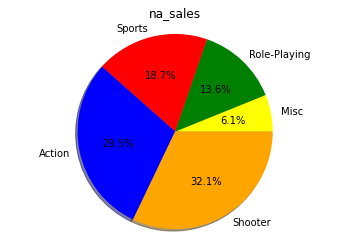

              eu_sales
genre                 
Racing           14.13
Role-Playing     28.17
Sports           45.73
Shooter          65.52
Action           74.68


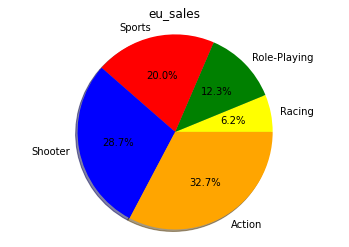

              jp_sales
genre                 
Shooter           4.87
Misc              5.61
Fighting          6.37
Action           29.58
Role-Playing     31.16


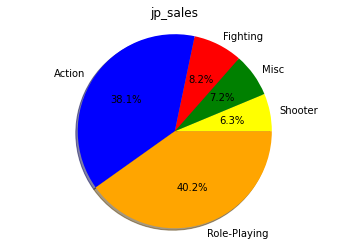

In [40]:
regions = ['na_sales','eu_sales','jp_sales']
for i in regions:
    data_genre = data_actual.pivot_table(values=i,index='genre',aggfunc='sum')
    data_genre = data_genre.sort_values(by= i).tail(5)
    print(data_genre)
    colors = ['yellow','green','red','blue','orange']
    plt.pie(data_genre[i],labels=data_genre.index,colors=colors,shadow=True,autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(i)
    plt.show()
    

Самый популярный жанр в Северной Америке Шутер, так же часто люди покупают игры в жанре экшен и спорт

В Европе жанр экшен занимает первое место, так же лидируют шутеры

В Японии шутеры занимают только 5 место в отличие от других регионов. На первом месте по популярности Role-Playing, почти такую же долю занимает жанр Экшен.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [41]:
data_actual['rating'].unique()

array(['no info', 'M', 'E', 'T', 'E10+'], dtype=object)

In [42]:
for i in regions:
    data_genre = data_actual.pivot_table(values=i,index='rating',aggfunc='sum')
    data_genre = data_genre.sort_values(by= i )
    print(data_genre)


         na_sales
rating           
E10+        33.23
T           38.95
E           50.74
no info     64.72
M           96.42
         eu_sales
rating           
E10+        26.16
T           34.07
E           58.06
no info     58.95
M           93.44
         jp_sales
rating           
E10+         4.46
M            8.01
E            8.94
T           14.78
no info     56.90


Наиболее продаваемые игры во всех регионах с рейтингами T,E,M и без рейтинга

В Северной Америке наиболее популярна категория "Для взрослых (17+)", так же популярна категория "без рейтинга". Возможно, это связано с популярностью шутеров. 

В Европе самая популярная категория - "Для взрослых(17+)", так же популярна категория "без рейтинга". 

В Японии шутеры не популярны. Наиболее популярные категории: "без рейтинга" и "Подросткам(13+)". Особенно сильно выделяется и лидирует по продажам категория "без рейтинга"

В Северной Америке и Европе одинаковая популярность категорий

In [43]:
temp = data_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no info    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

<b> ШАГ 5 </b>

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые 

In [44]:
score_mean_Xbox = data_actual[data_actual['platform'] == 'XOne']['user_score'].mean()
score_mean_PC = data_actual[data_actual['platform'] == 'PC']['user_score'].mean()
print(score_mean_Xbox)
print(score_mean_PC)

6.594545454545454
6.298360655737704


H_0: средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC


H_1: средний пользовательский рейтинг платформы Xbox One ≠  средний пользовательский рейтинг платформы PC

alpha = 0.05

In [45]:
alpha = 0.05

results = st.ttest_ind(
    (data_actual[data_actual['platform'] == 'XOne']['user_score']).dropna(), 
    (data_actual[data_actual['platform'] == 'PC']['user_score']).dropna(),equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Не получилось опровергнуть нулевую гипотезу. То есть, с вероятностью в 9% можно получить различность рейтингов платформ Xbox One и PC

Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные 

In [46]:
score_mean_Action = data_actual[data_actual['genre'] == 'Action']['user_score'].mean()
score_mean_Sports = data_actual[data_actual['genre'] == 'Sports']['user_score'].mean()
print(score_mean_Action)
print(score_mean_Sports)

6.760606060606061
5.225196850393701


H_0: средний пользовательский рейтинг жанра Action  = средний пользовательский рейтинг жанра Sports

H_1: средний пользовательский рейтинг жанра Action ≠ средний пользовательский рейтинг жанра Sports

alpha = 0.05

In [47]:
alpha = 0.05

results = st.ttest_ind(
    (data_actual[data_actual['genre'] == 'Action']['user_score']).dropna(), 
    (data_actual[data_actual['genre'] == 'Sports']['user_score']).dropna(),equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825550382644557e-14
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Практически нет вероятности получить одинаковые средние рейнтинги по жанрам Action и Sports.

<b> ШАГ 6 </b>

<div class="alert alert-block alert-info"><b>ВЫВОД:</b> Перед анализом данных мы подготовили данные: привели к правильным данным столбцы, привели к нижнему регистру  названия колонок.
Определили, что аббревиатура tbd значит to be determined. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа. Так же выяснили, что рейтинг ESRB предназначен для маркировки игр для США и Канады. Для других регионов он не заполняется. Поэтому поставили заглушки вместо пропусков.
Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года произошел резкий спад разработок консольных игр. Возможно,это связано с кризисом 2008 года и с началом массового создания мобильных игр. Мы выбрали актуальный период с 2014 до 2016 года, так как часть платформ перестали быть актуальными, а индустрия быстро меняется.
За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS.
Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет.
Исходя из анализа мы увидели, что у Wii был резкий скачок в 2006 году и такой же резкий провал. Скорее всего потому что у людей не было особого интереса к приставке, так как начали набирать популярность мобильные игры. 
Проведя анализ оценок пользователей и критиков, мы выявили, что оценки пользователей почти не влияют на выбор игры, но влияют оценки критиков. Нужно обращать внимание на оценки критиков.
Так же определили, что самый популярный жанр это шутер. На последнем месте приключения.

После мы составили портреты пользователей каждого региона.
Выяснили, что в Северной Америке самые популярные жанры это шутер, экшн и спорт. Игровые приставки : XOne, PS4. А по рейтингу игр люди предпочитают игры с рейтингами: "Для взрослых (17+)",  "без рейтинга" и  "для всех".
В Европе же, популярные категории по рейтингу и популярные жанры точно такие же как и в Северной Америке. Приставки предпочитают такие же, как в Северной Америке, но больше половины продаж занимает PS4. 
В Японии люди предпочитают игровые приставки: 3DS, PS4. А жанры игры : Role-Playing и Action. Рейтинг игр: "без рейтинга","для подростков (13+)".
Исходя из всех данных предполагаем, что лучше всего продавать игры для таких приставок как Sony Playstation 4
Жанр необходимо выбирать Шутер и выбирать игры с рейтингом "Для взрослых (17+)", тогда продажи будут значительно больше, чем если продавать другие игры. Для региона лучше всего подойдёт Европа.
</div>